# Jugo project

## Introduction

The goal for our project is to make an accurate system, potentially developed into an app for our 
client that makes him a time-saving daily schedule where it is shown how long it would take him to 
travel to both locations,  based on weather and traffic data.


In this project, we will be working with three distinct datasets. Each dataset will undergo a thorough examination to identify and perform necessary data cleaning and preprocessing steps. Oncethis is completed, the datasets will bemergedd into a single, unified dataset. Finally, we will apply a Gradient Boosting Machine model to train on this integrated dataset.Now, we would import the first out of the three dataframes:.

## Importing the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## Weather data
The weather data that is imported here is taken from the **WeatherDataCleaning file**, where detailed steps about the cleaning of the dataset have been specified as well as a description about the different column name meanings.
### Importing the data

In [2]:
df = pd.read_csv("datasets/CleanWeather.csv")
df.head()

,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),Highest Wind Gust (m/s),Temperature (0.1°C),Duration of Precipitation (hours),Precipitation Amount (mm),Visibility (m),Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator,Month,Season,DOP Sector
0,1951-01-01,380,23,98.000000,0.0,90.158365,22.0,0.0,0.83167,53.267449,0.0,0.0,0.0,0.0,0.0,1,Winter,0
1,1951-01-01,310,3,87.000000,87.0,89.262892,14.0,0.0,0.83167,51.162157,0.0,0.0,0.0,0.0,0.0,1,Winter,0
2,1951-01-01,310,2,93.000000,0.0,89.261606,11.0,0.0,0.83167,51.603766,0.0,0.0,0.0,0.0,0.0,1,Winter,0
3,1951-01-01,310,1,93.000000,0.0,89.371168,9.0,0.0,0.83167,52.037477,0.0,0.0,0.0,0.0,0.0,1,Winter,0
4,1951-01-01,290,24,60.025576,62.0,89.727013,21.0,0.0,0.83167,52.616341,0.0,0.0,0.0,0.0,0.0,1,Winter,0


In [3]:
df.shape

(19188675, 18)

### Checking missing data and data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188675 entries, 0 to 19188674
Data columns (total 18 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Date (YYYY-MM-DD)                  object 
 1   Station ID                         int64  
 2   Hour                               int64  
 3   Hourly Average Wind Speed (m/s)    float64
 4   Wind Speed (m/s)                   float64
 5   Highest Wind Gust (m/s)            float64
 6   Temperature (0.1°C)                float64
 7   Duration of Precipitation (hours)  float64
 8   Precipitation Amount (mm)          float64
 9   Visibility (m)                     float64
 10  Fog Indicator                      float64
 11  Rainfall Indicator                 float64
 12  Snow Indicator                     float64
 13  Thunderstorm Indicator             float64
 14  Ice Formation Indicator            float64
 15  Month                              int64  
 16  Season          

In [5]:
df.isna().sum()

Date (YYYY-MM-DD)                    0
Station ID                           0
Hour                                 0
Hourly Average Wind Speed (m/s)      0
Wind Speed (m/s)                     0
Highest Wind Gust (m/s)              0
Temperature (0.1°C)                  0
Duration of Precipitation (hours)    0
Precipitation Amount (mm)            0
Visibility (m)                       0
Fog Indicator                        0
Rainfall Indicator                   0
Snow Indicator                       0
Thunderstorm Indicator               0
Ice Formation Indicator              0
Month                                0
Season                               0
DOP Sector                           0
dtype: int64

It can be concluded that the file got imported correctly and is ready to be used further.

## Traffic data
The traffic data that is imported here is taken from the **TrafficDataCleaning file**, where detailed steps about the cleaning of the dataset have been specified as well as a data dictionary with data requirements. 
### Importing the data

In [6]:
traffic_data = pd.read_csv("datasets/CleanTraffic.csv")
traffic_data.head()

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime
0,3589057,2023-06-13,2023-06-13,16:54:29,17:00:06,13.480,2400.0,5.617,45.6,47.9,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:00:06
1,3589058,2023-06-13,2023-06-13,16:54:29,17:09:01,46.287,3185.0,14.533,31.4,28.2,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 15],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:09:01
2,3589060,2023-06-13,2023-06-13,16:54:29,16:56:05,5.120,3200.0,1.600,166.5,169.7,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 16:56:05
3,3589061,2023-06-13,2023-06-13,16:54:29,17:06:00,29.525,2564.0,11.517,82.8,85.6,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 12],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:06:00
4,3589062,2023-06-13,2023-06-13,16:54:29,17:04:00,28.952,3042.0,9.517,144.3,140.6,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 10],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:04:00


In [7]:
traffic_data.shape

(1581413, 28)

### Checking the data types and missing values

In [8]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581413 entries, 0 to 1581412
Data columns (total 28 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   TrafficJamNum        1581413 non-null  int64  
 1   StartDate            1581413 non-null  object 
 2   EndDate              1581413 non-null  object 
 3   StartTime            1581413 non-null  object 
 4   EndTime              1581413 non-null  object 
 5   Severity             1581413 non-null  float64
 6   Length               1581413 non-null  float64
 7   Duration             1581413 non-null  float64
 8   HectometerStart      1581413 non-null  float64
 9   HectometerEnd        1581413 non-null  float64
 10  RoadLetter           1581413 non-null  object 
 11  RoadNumber           1581413 non-null  int64  
 12  RoadDescr            1581413 non-null  object 
 13  HectometerDirection  1581413 non-null  object 
 14  RoadSectionFrom      1581413 non-null  object 
 15

In [9]:
traffic_data.isna().sum()

TrafficJamNum          0
StartDate              0
EndDate                0
StartTime              0
EndTime                0
Severity               0
Length                 0
Duration               0
HectometerStart        0
HectometerEnd          0
RoadLetter             0
RoadNumber             0
RoadDescr              0
HectometerDirection    0
RoadSectionFrom        0
RoadSectionTo          0
MainRoadFrom           0
MainRoadTo             0
CauseCodeDescr         0
CauseClass             0
CauseCodeClass         0
CauseCode              0
Cause_1                0
Cause_2                0
Cause_3                0
Cause_4                0
StartDateTime          0
EndDateTime            0
dtype: int64

It can be concluded that the file got imported correctly and is ready to be used further.

## Weather stations data
The traffic data that is imported here is taken from the **WeatherStations&InitialEDA** file, where detailed steps about the cleaning of the dataset have been specified as well as a short data exploration.

### Importing the data and checking its quality

In [10]:
weather_stations = pd.read_csv("datasets/weather_stations.csv")
weather_stations.head()

,STN,LON(east),LAT(north),ALT(m),NAME
0,209,4.518,52.465,0.0,IJmond
1,210,4.430,52.171,-0.2,Valkenburg Zh
2,215,4.437,52.141,-1.1,Voorschoten
3,225,4.555,52.463,4.4,IJmuiden
4,235,4.781,52.928,1.2,De Kooy


In [11]:
weather_stations.shape

(50, 5)

In [12]:
weather_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STN         50 non-null     int64  
 1   LON(east)   50 non-null     float64
 2   LAT(north)  50 non-null     float64
 3   ALT(m)      50 non-null     float64
 4   NAME        50 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.1+ KB


We can see that the datatypes seem to correspong to what is expected for each column.

In [13]:
weather_stations.isna().sum()

STN           0
LON(east)     0
LAT(north)    0
ALT(m)        0
NAME          0
dtype: int64

There seem to be no NAs in our data and the data types are correct. The rest of the exloration and cleaning of this dataset can be found in the **WeatherStations&InitialEDA** file. Therefore, it can be concluded that the data can be used further.

### Relevant weather stations
It might be relevant that we consider only data from weather stations that are close to the cities of interest. Initially, we tried considering the closest 3 stations to each city that our customer needs to travel to. However, due to large number of data, we were forced to reduce it to only one weather station per city. Below, I calculate the exact distance, in km, from the closest weather station for each city, as well as the number of the specific station.

In [14]:
from geopy.distance import geodesic

# Coordinates of Hertogenbosch, Sittard, and Boxmeer
cities = {
    'Hertogenbosch': (51.6978, 5.3037),
    'Sittard': (50.9989, 5.866),
    'Boxmeer': (51.6444, 5.9473)
}

# Function to calculate distance between two points using geopy
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Calculate distances for each city and sort weather stations based on distance
closest_stations = {}
for city, city_coords in cities.items():
    distances = {}
    for index, row in weather_stations.iterrows():
        station_coords = (row['LAT(north)'], row['LON(east)'])
        station_id = row['STN']
        distance = calculate_distance(city_coords, station_coords)
        distances[station_id] = distance
    closest_stations[city] = sorted(distances.items(), key=lambda x: x[1])[:2]

# Print the closest weather stations for each city
for city, stations in closest_stations.items():
    print(f"Closest weather stations to {city}:")
    for station_id, distance in stations:
        print(f"Station ID: {station_id}, Distance: {distance:.2f} km")
    print()

Closest weather stations to Hertogenbosch:
Station ID: 356, Distance: 20.98 km
Station ID: 370, Distance: 27.93 km

Closest weather stations to Sittard:
Station ID: 380, Distance: 12.66 km
Station ID: 377, Distance: 23.30 km

Closest weather stations to Boxmeer:
Station ID: 375, Distance: 16.71 km
Station ID: 391, Distance: 23.77 km



# Data joining
## Data preparation for joining
### Weather data

As we want to join based on only the closest weather station to each city of interest, we store these stations' names in a variable, that we later use to filter the weather data to only display records that are coming from the stations of interest. 

In [15]:
unique_ids = set(id_ for station_list in closest_stations.values() for id_, _ in station_list)
unique_ids

{356, 370, 375, 377, 380, 391}

Apart from the weather stations, another important factor for the join is the date. We want to make sure that the dates in both dataset start and end at the same time.

In [16]:
print("Traffic data start:", traffic_data['StartDate'].min())
print("Traffic data end:", traffic_data['StartDate'].max())
print("Weather data start:", df['Date (YYYY-MM-DD)'].min())
print("Weather data end:", df['Date (YYYY-MM-DD)'].max())

max_start_date = max(traffic_data['StartDate'].min(), df['Date (YYYY-MM-DD)'].min())
min_end_date = min(traffic_data['StartDate'].max(), df['Date (YYYY-MM-DD)'].max())
print("--------------------------------------")
print("Start date:", max_start_date)
print("End date:", min_end_date)

Traffic data start: 2015-01-01
Traffic data end: 2024-02-29
Weather data start: 1951-01-01
Weather data end: 2024-03-25
--------------------------------------
Start date: 2015-01-01
End date: 2024-02-29


In [17]:
filtered_weather_data = df[(df['Date (YYYY-MM-DD)'] >= max_start_date) & (df['Date (YYYY-MM-DD)'] <= min_end_date)]
print("Minimum date:", filtered_weather_data['Date (YYYY-MM-DD)'].min(), "and maximum date:", filtered_weather_data['Date (YYYY-MM-DD)'].max())

Minimum date: 2015-01-01 and maximum date: 2024-02-29


In [18]:
filtered_weather_data = filtered_weather_data[filtered_weather_data['Station ID'].isin(unique_ids)]
print(filtered_weather_data.shape)
filtered_weather_data.sample(3)

(481968, 18)


,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),Highest Wind Gust (m/s),Temperature (0.1°C),Duration of Precipitation (hours),Precipitation Amount (mm),Visibility (m),Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator,Month,Season,DOP Sector
18760701,2023-03-04,380,15,30.0,30.0,50.0,66.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,3,Winter,1
17547896,2020-03-07,370,16,60.0,70.0,100.0,94.0,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,3,Winter,1
16734677,2018-03-17,380,9,100.0,100.0,130.0,-24.0,0.0,1.0,57.0,0.0,0.0,1.0,0.0,0.0,3,Winter,1


After filtering for the relevant stations, we still have around half a million observations in the weather dataset.

In [19]:
hourlyobservations = filtered_weather_data.groupby(['Station ID', 'Date (YYYY-MM-DD)', 'Hour']).size()
hourlyobservations = hourlyobservations.reset_index(name='NumObs')
print("Min number of observations per hour:", hourlyobservations['NumObs'].min())
print("Max number of observations per hour:", hourlyobservations['NumObs'].max())

Min number of observations per hour: 1
Max number of observations per hour: 1


It seems that we have the weather indicators measured 1 time per hour in each relevant station. Therefore, we need to come up with a solution that would allow us to make sure that for each traffic jam we have weather data in place.

### Traffic data

It looks like there might be observations that contain traffic jams that continued from one day until the other. Therefore, when joining we need to carefully consider whether we want to join based on the start or end date and time.

In [20]:
traffic_data[traffic_data['StartDate'] != traffic_data['EndDate']] 

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime
6536,3568729,2023-06-03,2023-06-04,23:52:22,0:31:03,111.825,2891.000,38.683,62.6,59.0,...,Wegwerkzaamheden,"[Geen oorzaakcode opgegeven door VWM 4], [Wegw...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-03 23:52:22,2023-06-04 00:31:03
11132,3571530,2023-06-05,2023-06-06,23:54:20,0:51:48,208.273,3624.000,57.467,55.1,50.1,...,Wegwerkzaamheden,"[Geen oorzaakcode opgegeven door VWM 10], [Weg...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-05 23:54:20,2023-06-06 00:51:48
11133,3571532,2023-06-05,2023-06-06,23:59:20,1:34:20,264.233,2781.000,95.000,79.1,76.7,...,Wegwerkzaamheden,"[Geen oorzaakcode opgegeven door VWM 5], [Wegw...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-05 23:59:20,2023-06-06 01:34:20
13722,3576406,2023-06-07,2023-06-08,21:13:25,0:42:54,597.529,2852.000,209.483,44.1,41.3,...,Werkzaamheden (en file buiten spits zonder oor...,"[Geen oorzaakcode opgegeven door VWM 59], [Weg...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-07 21:13:25,2023-06-08 00:42:54
14007,3576426,2023-06-07,2023-06-08,22:13:23,0:07:33,284.758,2494.000,114.167,15.4,12.8,...,File buiten spits zonder oorzaak (met werkzaam...,"[Geen oorzaakcode opgegeven door VWM 60], [Weg...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-07 22:13:23,2023-06-08 00:07:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565809,2762411,2020-06-06,2020-06-07,23:52:00,0:45:47,161.350,3000.000,53.783,88.4,91.4,...,Ongeval (met ander incident),"[Geen oorzaakcode opgegeven door VWM 1], [Onge...","[000], [ACI], [N03]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-06-06 23:52:00,2020-06-07 00:45:47
1565832,2761918,2020-06-03,2020-06-04,23:46:00,0:27:21,123.900,2996.372,41.350,126.0,124.0,...,Ongeval(len),[Ongeval(len) 41],[ACI],ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-06-03 23:46:00,2020-06-04 00:27:21
1569022,2811903,2021-04-16,2021-04-17,21:32:00,0:07:07,456.083,2940.260,155.117,29.6,31.6,...,Werkzaamheden op aansluitende weg,"[Geen oorzaakcode opgegeven door VWM 1], [Onge...","[000], [N65], [RWK], [N60]",N60,Werkzaamheden op aansluitende weg,Werkzaamheden elders,Werkzaamheden,Aanleg en gepland onderhoud,2021-04-16 21:32:00,2021-04-17 00:07:07
1578595,2798351,2020-12-30,2020-12-31,18:57:00,1:16:19,1549.400,4084.714,379.317,95.3,93.3,...,Ongeval vrachtwagen (met spoedreparatie),"[Ongeval(len) 16], [Ongeval met vrachtwagen(s)...","[ACI], [ACH], [N32]",ACH,Ongeval met vrachtwagen(s),Ongeval vrachtwagen,Ongeval,Ongeval,2020-12-30 18:57:00,2020-12-31 01:16:19


To join later on date and hour, we want to make a new column containing only the hour of the traffic jam start.

In [21]:
traffic_data['Hour'] = traffic_data['StartTime'].apply(lambda x: x.split(':')[0]).astype(int)
traffic_data

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Hour
0,3589057,2023-06-13,2023-06-13,16:54:29,17:00:06,13.480,2400.000,5.617,45.6,47.9,...,[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:00:06,16
1,3589058,2023-06-13,2023-06-13,16:54:29,17:09:01,46.287,3185.000,14.533,31.4,28.2,...,[Geen oorzaakcode opgegeven door VWM 15],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:09:01,16
2,3589060,2023-06-13,2023-06-13,16:54:29,16:56:05,5.120,3200.000,1.600,166.5,169.7,...,[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 16:56:05,16
3,3589061,2023-06-13,2023-06-13,16:54:29,17:06:00,29.525,2564.000,11.517,82.8,85.6,...,[Geen oorzaakcode opgegeven door VWM 12],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:06:00,16
4,3589062,2023-06-13,2023-06-13,16:54:29,17:04:00,28.952,3042.000,9.517,144.3,140.6,...,[Geen oorzaakcode opgegeven door VWM 10],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:04:00,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581408,2756774,2020-04-10,2020-04-10,6:31:00,7:14:41,102.150,2338.421,43.683,52.3,50.3,...,"[Geen oorzaakcode opgegeven door VWM 1], [Opru...","[000], [CLE]",CLE,Opruimwerkzaamheden,Opruimwerkzaamheden,Incident (opruimwerkzaamheden),Incident,2020-04-10 06:31:00,2020-04-10 07:14:41,6
1581409,2756818,2020-04-10,2020-04-10,16:46:00,17:35:32,139.217,2810.565,49.533,146.2,144.2,...,"[Opruimingswerkzaamheden 46], [Eerder(e) ongev...","[OCL], [ACA]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-04-10 16:46:00,2020-04-10 17:35:32,16
1581410,2756726,2020-04-09,2020-04-09,14:14:00,14:17:40,7.333,2000.000,3.667,30.0,32.0,...,"[Geen oorzaakcode opgegeven door VWM 1], [Te h...","[000], [OHW], [000]",OHW,"Te hoog voertuig gesignaleerd, wordt afgehandeld",Hoogtemelding,Incident,Incident,2020-04-09 14:14:00,2020-04-09 14:17:40,14
1581411,2756735,2020-04-09,2020-04-09,16:03:00,16:15:27,25.900,2080.321,12.450,51.5,53.5,...,[Geen oorzaakcode opgegeven door VWM 12],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2020-04-09 16:03:00,2020-04-09 16:15:27,16


To get an overview of the times when most traffic jams happen, we can create a line/bar chart.

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Traffic Jams')
plt.title('Number of Traffic Jams During the 24 Hours of the Day')
plt.xticks(range(0, 24)) # Ensure all hours are shown on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

TypeError: 'module' object is not callable

As expected, it seems that most traffic jams happen during the morning, mainly between 7 and 9, as well as at the end of the workday, approximately from 16 to 18. This matches perfectly with the 9 to 17 schedule most people work by.

#### A2 and A73 

As we want to only have the specific roads that our client can possibly use to reach the offices, we will prepare the data for joining by filtering on the roads A2 and A73.

In [ ]:
filtered_traffic= traffic_data[(traffic_data['RoadDescr'] == 'A73') | (traffic_data['RoadDescr'] == 'A2')]
filtered_traffic

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Hour
7,3589149,2023-06-13,2023-06-13,17:03:29,17:17:00,32.867,2432.000,13.517,115.9,118.1,...,[Geen oorzaakcode opgegeven door VWM 14],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 17:03:29,2023-06-13 17:17:00,17
41,3589794,2023-06-13,2023-06-13,18:37:28,18:43:00,16.465,2976.000,5.533,92.0,89.5,...,[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 18:37:28,2023-06-13 18:43:00,18
61,3590025,2023-06-14,2023-06-14,7:12:25,7:25:02,41.488,3288.000,12.617,43.8,41.4,...,[Geen oorzaakcode opgegeven door VWM 13],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:12:25,2023-06-14 07:25:02,7
66,3590065,2023-06-14,2023-06-14,7:25:25,8:07:00,216.928,5217.000,41.583,44.2,40.0,...,[Geen oorzaakcode opgegeven door VWM 42],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:25:25,2023-06-14 08:07:00,7
74,3590164,2023-06-14,2023-06-14,7:49:26,7:51:00,3.447,2200.000,1.567,105.5,103.3,...,[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:49:26,2023-06-14 07:51:00,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581684,2757675,2020-04-23,2020-04-23,12:12:00,12:32:56,57.350,2739.650,20.933,162.3,164.3,...,"[Geen oorzaakcode opgegeven door VWM 1], [Defe...","[000], [BKD], [000]",BKD,Defect(e) voertuig(en),Defect voertuig,Incident (gestrand voertuig),Incident,2020-04-23 12:12:00,2020-04-23 12:32:56,12
1581715,2757792,2020-04-24,2020-04-24,13:35:00,13:45:06,20.200,2000.000,10.100,219.2,221.2,...,"[Geen oorzaakcode opgegeven door VWM 1], [Onge...","[000], [ACI], [000]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-04-24 13:35:00,2020-04-24 13:45:06,13
1581760,2756631,2020-04-08,2020-04-08,12:58:00,15:06:07,405.883,3168.076,128.117,90.6,92.6,...,"[Geen oorzaakcode opgegeven door VWM 3], [Opru...","[000], [OCL], [HBD], [OCL]",HBD,Defecte vrachtwagen(s),Defecte vrachtwagen,Incident (gestrand voertuig),Incident,2020-04-08 12:58:00,2020-04-08 15:06:07,12
1581765,2756680,2020-04-09,2020-04-09,6:25:00,6:31:41,13.367,2000.000,6.683,68.9,70.9,...,"[Ongeval(len) 5], [Eerder(e) ongeval(len) 2]","[ACI], [ACA]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-04-09 06:25:00,2020-04-09 06:31:41,6


## Data joining
There are several types of joins:
* Inner join - An inner join requires each row in the two joined dataframes to have matching column values. This is similar to the intersection of two sets.
* Left (outer) join - A left join returns a dataframe containing all the rows of the left dataframe. All the non-matching rows of the left dataframe contain NaN for the columns in the right dataframe. It is simply an inner join plus all the non-matching rows of the left dataframe filled with NaN for columns of the right dataframe.
* Right (outer) join - A right join is similar to the Left Outer Join. The only difference is that all the rows of the right dataframe are taken as it is and only those of the left dataframe that are common in both.
* Semi-join - A semi-join returns rows from the left table for which there are corresponding matching rows in the right table. Unlike regular joins which include the matching rows from both tables, a semi-join only includes columns from the left table in the result.
* Anti-join - An anti-join allows you to return all rows in one dataset that do not have matching values in another dataset. 
* Full (outer) join - A full join returns all those records which either have a match in the left or right dataframe. When rows in both the dataframes do not match, the resulting dataframe will have NaN for every column of the dataframe that lacks a matching row.

Sources:
* https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/
* https://www.statology.org/pandas-anti-join/
* https://www.geeksforgeeks.org/difference-between-anti-join-and-semi-join/

### Inner join version
For this kind of join, we are aiming at getting only the values that are matching in all tables.
#### Weather data and weather stations join

First, we join the weather data with the stations data, so we can have now the details of the stations and the daily weather values in one table.

In [ ]:
merged_weather_data = pd.merge(weather_stations, filtered_weather_data, left_on='STN', right_on='Station ID')
merged_weather_data

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),...,Precipitation Amount (mm),Visibility (m),Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator,Month,Season,DOP Sector
0,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,1,40.0,40.0,...,0.0,52.037477,0.0,0.0,0.0,0.0,0.0,1,Winter,1
1,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,19,70.0,70.0,...,0.0,55.007178,0.0,0.0,0.0,0.0,0.0,1,Winter,1
2,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,18,70.0,70.0,...,0.0,55.157257,0.0,0.0,0.0,0.0,0.0,1,Winter,1
3,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,17,70.0,80.0,...,0.0,55.575877,0.0,0.0,0.0,0.0,0.0,1,Winter,1
4,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,16,60.0,60.0,...,0.0,56.345072,0.0,0.0,0.0,0.0,0.0,1,Winter,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481963,391,6.197,51.498,19.5,Arcen,2024-02-29,391,20,30.0,40.0,...,0.0,54.647627,0.0,0.0,0.0,0.0,0.0,2,Winter,1
481964,391,6.197,51.498,19.5,Arcen,2024-02-29,391,21,40.0,30.0,...,0.0,54.249000,0.0,0.0,0.0,0.0,0.0,2,Winter,1
481965,391,6.197,51.498,19.5,Arcen,2024-02-29,391,22,20.0,30.0,...,0.0,53.796479,0.0,0.0,0.0,0.0,0.0,2,Winter,1
481966,391,6.197,51.498,19.5,Arcen,2024-02-29,391,23,30.0,30.0,...,0.0,53.267449,0.0,0.0,0.0,0.0,0.0,2,Winter,1


From the inner join above, we expect 481.968 as these are the number of rows in the weather dataframe that should have an exact match in the weather stations data since the primary key is the Station ID. That is exactly what we get.

#### Merged weather data and traffic jams join
First, since our target variable is located in the traffic dataset, let's perform a right join with it being the right table in order to see if there are any rows in the weather data that are missing for the traffic data.

In [ ]:
merged_right_test = pd.merge(merged_weather_data, filtered_traffic, left_on=['Date (YYYY-MM-DD)', 'Hour'], right_on=['StartDate', 'Hour'], how = "right")
nan_columns = merged_right_test.columns[merged_right_test.isna().any()]

print(merged_right_test[nan_columns].isna().sum())

STN                                  54
LON(east)                            54
LAT(north)                           54
ALT(m)                               54
NAME                                 54
Date (YYYY-MM-DD)                    54
Station ID                           54
Hourly Average Wind Speed (m/s)      54
Wind Speed (m/s)                     54
Highest Wind Gust (m/s)              54
Temperature (0.1°C)                  54
Duration of Precipitation (hours)    54
Precipitation Amount (mm)            54
Visibility (m)                       54
Fog Indicator                        54
Rainfall Indicator                   54
Snow Indicator                       54
Thunderstorm Indicator               54
Ice Formation Indicator              54
Month                                54
Season                               54
DOP Sector                           54
dtype: int64


It turns out that there are 54 rows in the traffic dataset for which there is no corresponding weather data. Fortunately, this number is not too large. However, when we perform an inner join, logically, there are no missing values in the results as only the intersecting rows are taken. However, in that way, we are ignoring these 54 traffic jam occurances.

In [ ]:
merged_data = pd.merge(merged_weather_data, filtered_traffic, left_on=['Date (YYYY-MM-DD)', 'Hour'], right_on=['StartDate', 'Hour'])
print(merged_data.shape)
merged_data.sample(5)

(1149186, 51)


,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime
795488,380,5.762,50.906,114.3,Maastricht,2016-11-18,380,17,70.0,50.0,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2016-11-18 17:38:00,2016-11-18 17:39:32
690657,377,5.763,51.198,30.0,Ell,2022-07-08,377,15,20.0,30.0,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 12],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2022-07-08 15:45:27,2022-07-08 15:57:02
646375,377,5.763,51.198,30.0,Ell,2019-03-29,377,7,10.0,10.0,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 0],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2019-03-29 07:43:00,2019-03-29 07:43:26
1018976,391,6.197,51.498,19.5,Arcen,2018-10-03,391,17,10.0,10.0,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 66],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2018-10-03 17:47:00,2018-10-03 18:52:54
768247,380,5.762,50.906,114.3,Maastricht,2015-03-10,380,16,40.0,40.0,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2015-03-10 16:38:00,2015-03-10 16:40:25


In the resulting dataframe, we have in total 1.149.186 rows.

In [ ]:
nan_columns = merged_data.columns[merged_data.isna().any()]
print(merged_data[nan_columns].isna().sum())

Series([], dtype: float64)


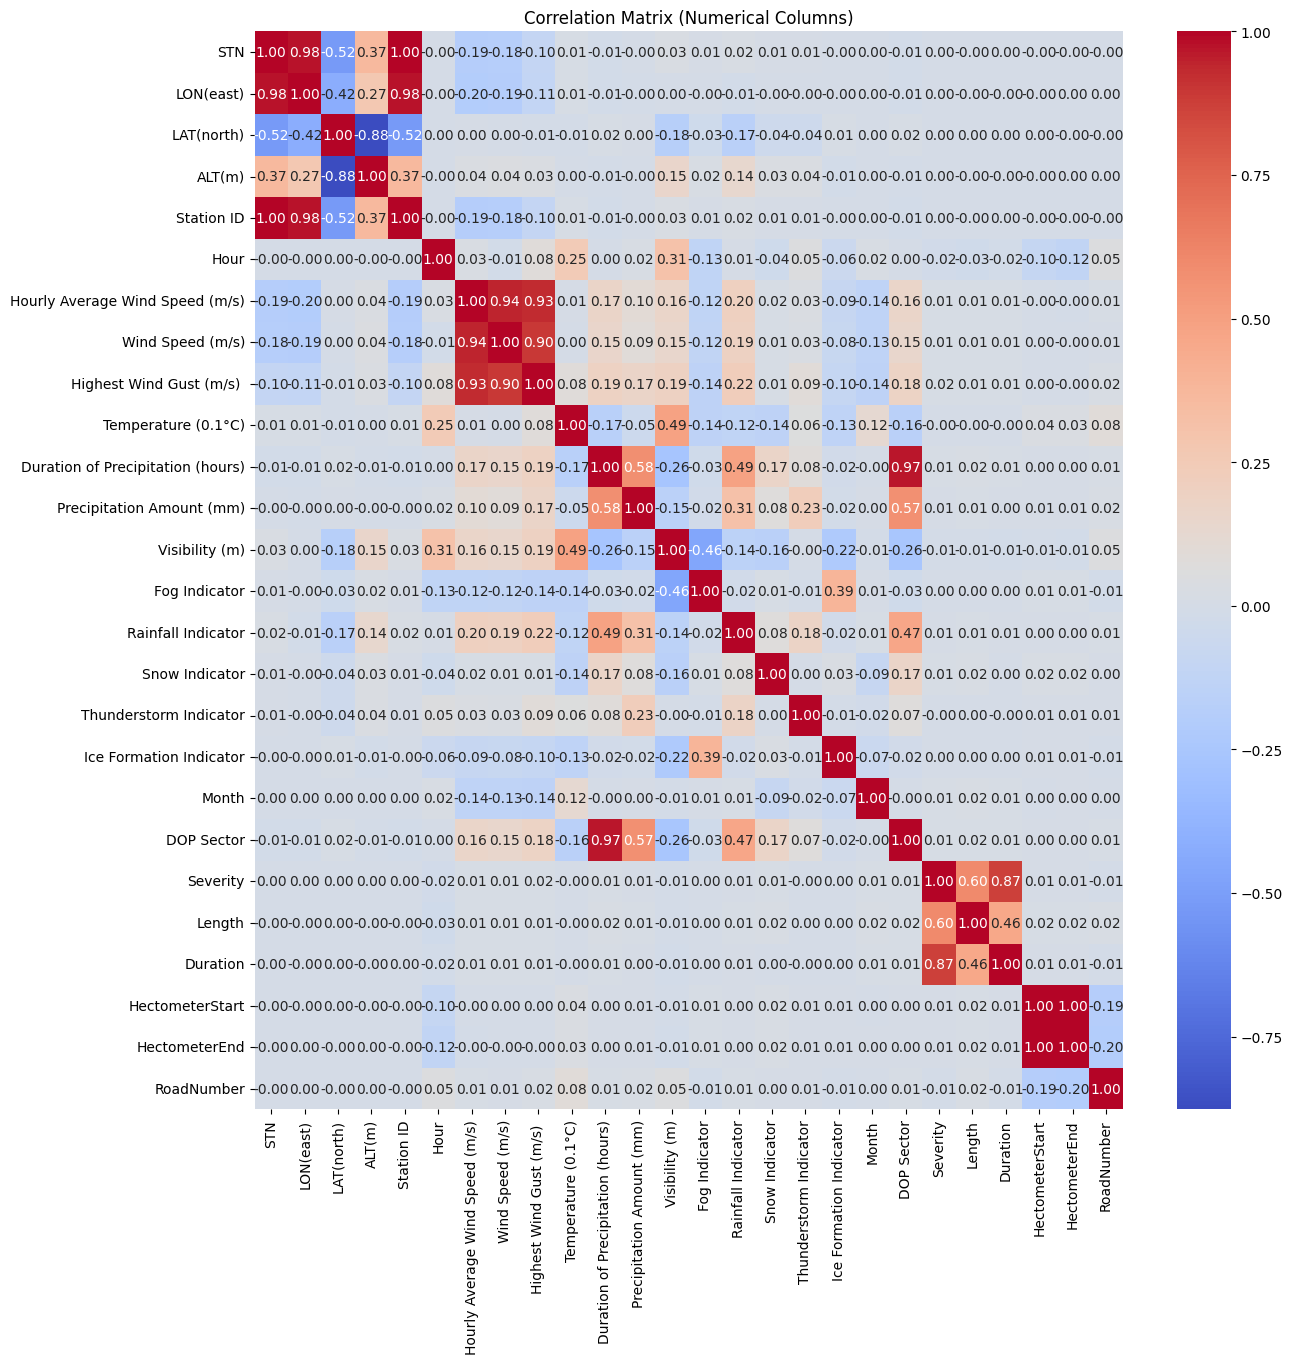

In [ ]:
numerical_columns = merged_data.select_dtypes(include=['int64', 'float64', 'int32'])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Columns)')
plt.show()

Still no relevant correlation :-(

### Left join



In [ ]:
merged_left_test = pd.merge(merged_weather_data, filtered_traffic, left_on=['Date (YYYY-MM-DD)', 'Hour'], right_on=['StartDate', 'Hour'], how = "left")
nan_columns = merged_left_test.columns[merged_left_test.isna().any()]

print(merged_left_test[nan_columns].isna().sum())

TrafficJamNum          358950
StartDate              358950
EndDate                358950
StartTime              358950
EndTime                358950
Severity               358950
Length                 358950
Duration               358950
HectometerStart        358950
HectometerEnd          358950
RoadLetter             358950
RoadNumber             358950
RoadDescr              358950
HectometerDirection    358950
RoadSectionFrom        358950
RoadSectionTo          358950
MainRoadFrom           358950
MainRoadTo             358950
CauseCodeDescr         358950
CauseClass             358950
CauseCodeClass         358950
CauseCode              358950
Cause_1                358950
Cause_2                358950
Cause_3                358950
Cause_4                358950
StartDateTime          358950
EndDateTime            358950
dtype: int64


### Creating a labels for the traffic duration

To classify traffic duration in an attempt to facilitate easier predicion, we will be assingning different labels to each record depending on the minutes spent in the traffic jam. Therefore, the categories will be named and assigned based on the following ranges:
* none - 0
* light - 15 minutes 
* medium - 30 minutes
* heavy - 1 hour
* extreme - 1 hour +

    

In [ ]:
import numpy as np

# Define the bins and their labels
bins = [-np.inf, 0, 15, 30, 60, np.inf]
labels = ['none', 'light', 'medium', 'heavy', 'extreme']

# Create the new column
merged_left_test['Duration Category'] = pd.cut(merged_left_test['Duration'].fillna(0), bins=bins, labels=labels)

# Replace NaN values with 'none'
merged_left_test['Duration Category'].fillna('none', inplace=True)
merged_left_test['Length'].fillna(0, inplace=True)
merged_left_test['Severity'].fillna(0, inplace=True)


merged_left_test.head()

C:\Users\kenar\AppData\Local\Temp\ipykernel_9584\89411471.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_left_test['Duration Category'].fillna('none', inplace=True)
C:\Users\kenar\AppData\Local\Temp\ipykernel_9584\89411471.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),...,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Duration Category
0,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,1,40.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,none
1,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,19,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,none
2,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,18,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,none
3,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,17,70.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,none
4,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,16,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,none


In [ ]:
# Define the mapping
category_mapping = {'none': 0, 'light': 1, 'medium': 2, 'heavy': 3, 'extreme': 4}

# Apply the mapping to the 'Duration Category' column
merged_left_test['encoded_type'] = merged_left_test['Duration Category'].map(category_mapping)

# Convert the 'encoded_type' column to integer
merged_left_test['encoded_type'] = merged_left_test['encoded_type'].astype(int)

# Display a sample of the DataFrame
merged_left_test.sample(10)

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),...,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Duration Category,encoded_type
1435124,391,6.197,51.498,19.5,Arcen,2022-10-20,391,17,30.0,30.0,...,[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2022-10-20 17:27:28,2022-10-20 17:39:00,light,1
234677,356,5.146,51.859,0.7,Herwijnen,2023-10-28,356,13,70.0,60.0,...,[000],003,File buiten spits (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-10-28 13:48:28,2023-10-28 13:50:02,light,1
927087,377,5.763,51.198,30.0,Ell,2022-09-16,377,15,40.0,40.0,...,[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2022-09-16 15:45:28,2022-09-16 15:49:00,light,1
1253547,380,5.762,50.906,114.3,Maastricht,2024-02-05,380,8,80.0,90.0,...,[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2024-02-05 08:30:31,2024-02-05 08:34:00,light,1
190307,356,5.146,51.859,0.7,Herwijnen,2023-01-19,356,8,50.0,50.0,...,[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-01-19 08:37:27,2023-01-19 08:47:02,light,1
1159529,380,5.762,50.906,114.3,Maastricht,2022-04-15,380,17,50.0,60.0,...,[000],002,Spitsfile (geen oorzaak gemeld) met gevonden w...,Geen oorzaak gemeld,Drukte,Hoge intensiteit,2022-04-15 17:04:29,2022-04-15 17:10:01,light,1
595046,375,5.707,51.659,22.0,Volkel,2018-12-18,375,6,40.0,40.0,...,"[000], [ACA]",ACA,Eerder(e) ongeval(len),Ongeval,Ongeval,Ongeval,2018-12-18 06:37:00,2018-12-18 06:56:38,medium,2
1306055,391,6.197,51.498,19.5,Arcen,2017-03-24,391,8,50.0,50.0,...,[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2017-03-24 08:51:00,2017-03-24 08:56:08,light,1
485463,370,5.377,51.451,22.6,Eindhoven,2023-10-26,370,16,20.0,20.0,...,[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-10-26 16:49:30,2023-10-26 16:51:03,light,1
153272,356,5.146,51.859,0.7,Herwijnen,2022-04-08,356,14,40.0,40.0,...,[000],003,File buiten spits (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2022-04-08 14:44:28,2022-04-08 15:07:01,medium,2


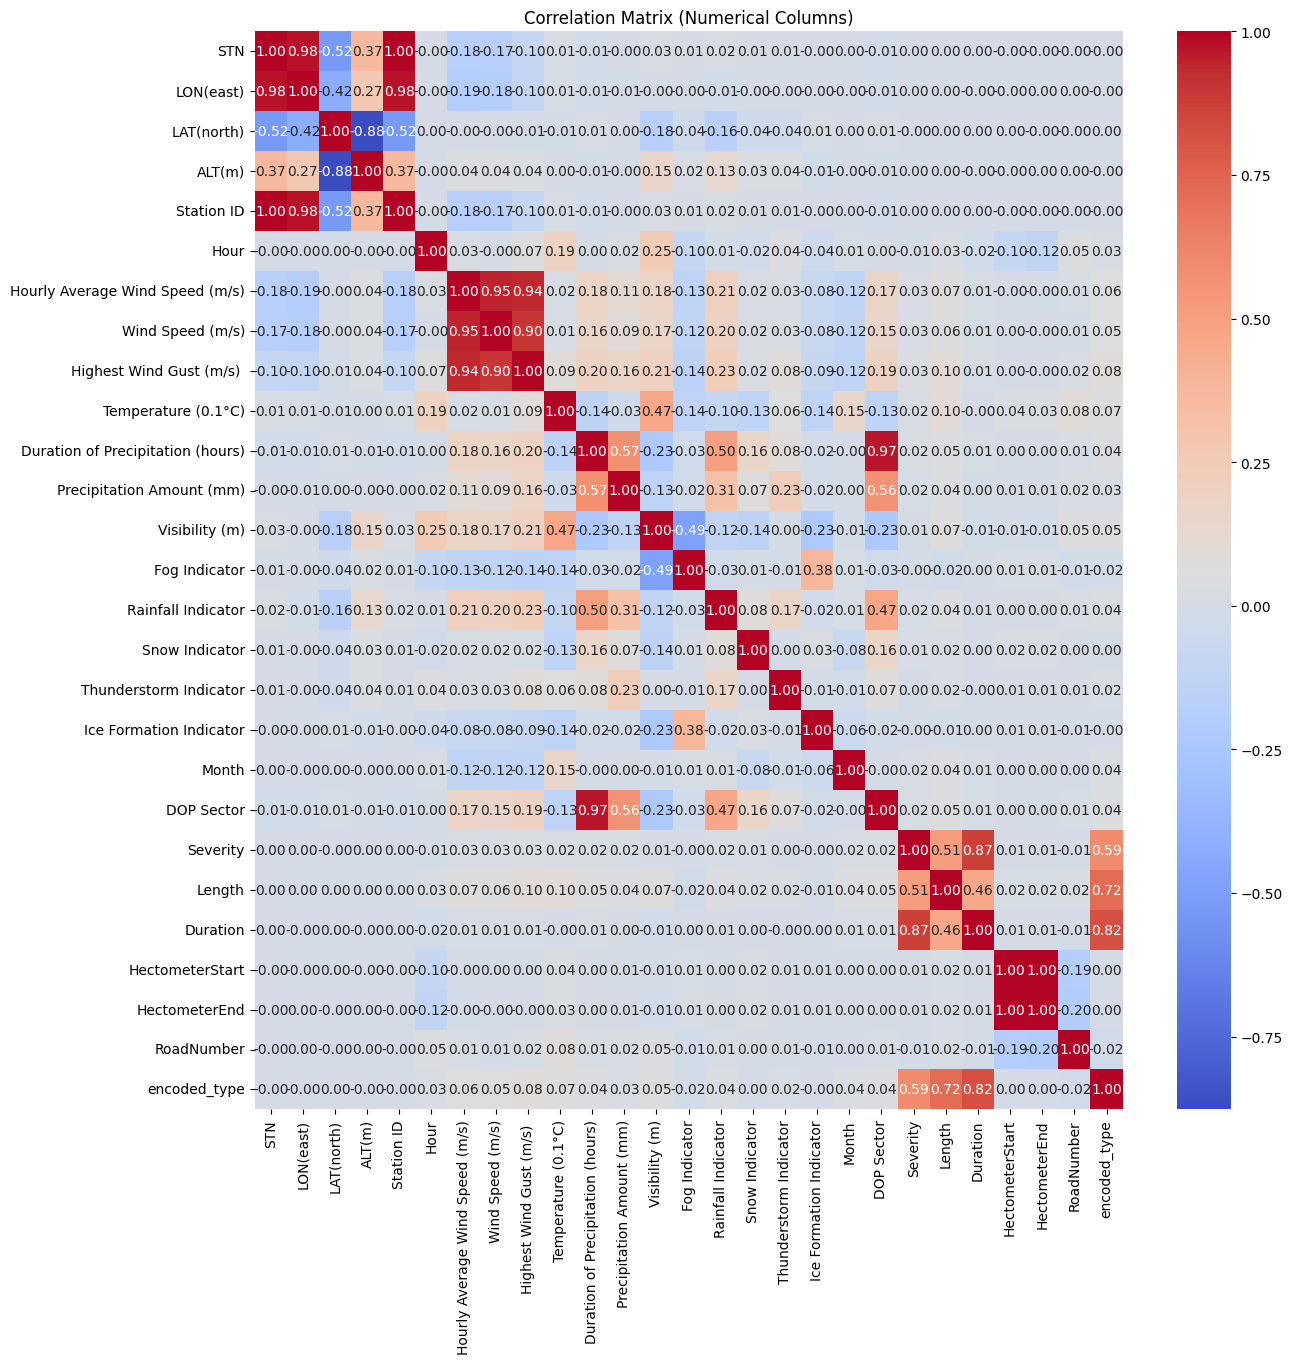

In [ ]:

numerical_columns = merged_left_test.select_dtypes(include=['int64', 'float64', 'int32'])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Columns)')
plt.show()

# Modelling

Despite the fact that we do not have a lot of relevant correlations, we can still try to find an algorythm that will help us out, to find 

## Support Vector Machines

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearnex import patch_sklearn
patch_sklearn()


merged_data_sample = merged_left_test.sample(n=100000, random_state=42) # sampling because it could not load

target = "encoded_type"
y = merged_data_sample[target]

features = ['Hourly Average Wind Speed (m/s)','Highest Wind Gust (m/s) ', 'Temperature (0.1°C)', 'Hour']
X = merged_data_sample[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model finding accuracy
svc = SVC(kernel='rbf')

# Fit the model to the training data
svc.fit(X_train_scaled, y_train)

# Make predictions on the test data
svc_pred = svc.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy_svc = accuracy_score(y_test, svc_pred)
print("Accuracy:", accuracy_svc)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Accuracy: 0.6766


## Random Forest



In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 150, max_depth=10, n_jobs=-1,min_samples_split=10)
random_forest.fit(X_train, y_train)
random_forest.score(X_test, y_test)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
c:\Users\kenar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.69385

Due to increased accuracy in Random Forest at this stage, we will proceed further with the evaluation in this model.

### Evaluation

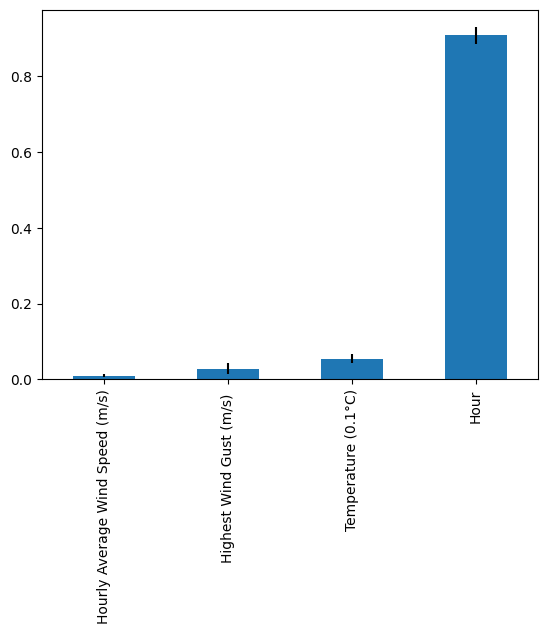

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
forest_importances = pd.Series(random_forest.feature_importances_, index=features)
standard_deviation = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
plt.figure()
forest_importances.plot.bar(yerr=standard_deviation)
plt.show()

We can see that the prediction is mainly relying on the `Hour` feature as it seems to contribute in proportion of about 90% to the final result. The other features are quite insignificant in comparison to this one.

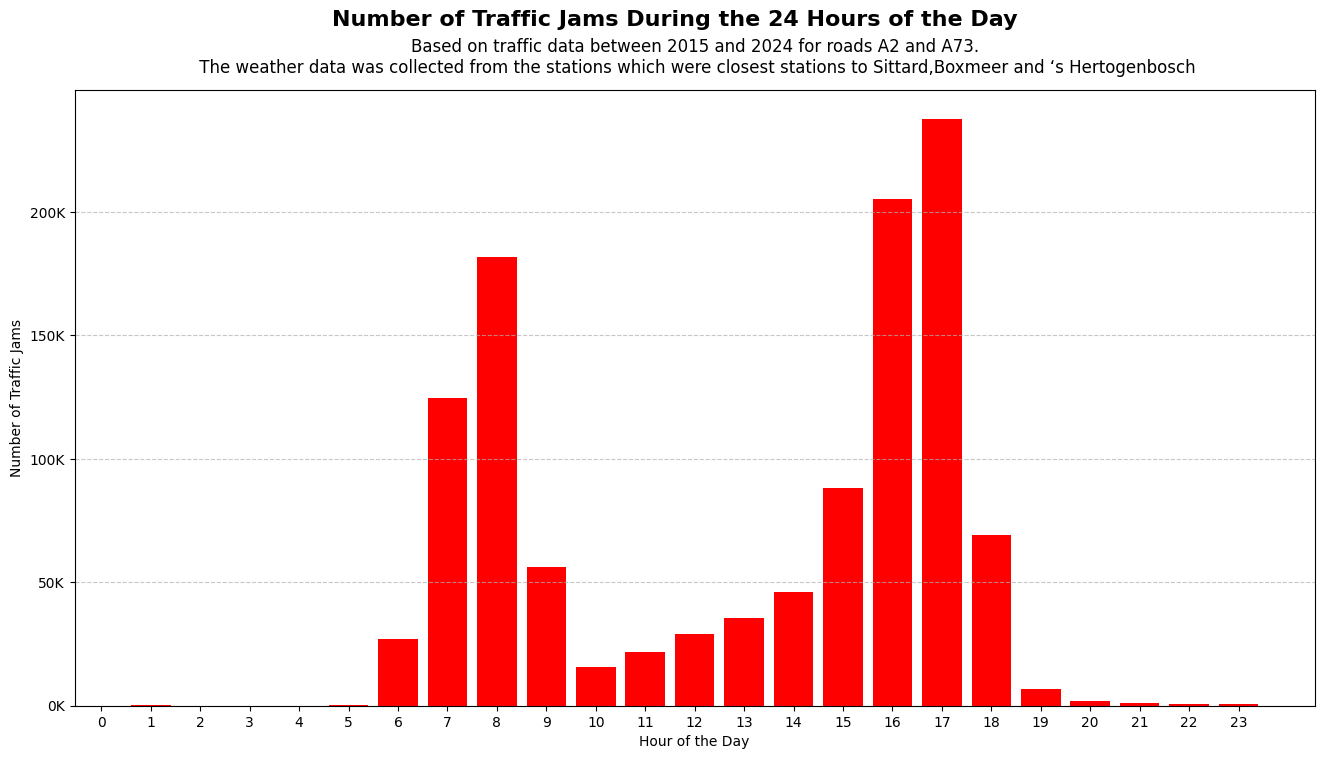

In [ ]:
from matplotlib.ticker import FuncFormatter

hourly_counts_2 = merged_left_test[merged_left_test["Duration"]>0]
hourly_counts_2 = hourly_counts_2['Hour'].value_counts().sort_index()
plt.figure(figsize=(16, 8))
plt.bar(hourly_counts_2.index, hourly_counts_2.values, color='red')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Traffic Jams')

# Define a function to format the y-axis labels
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)

formatter = FuncFormatter(thousands)

plt.gca().yaxis.set_major_formatter(formatter)

plt.suptitle('Number of Traffic Jams During the 24 Hours of the Day', fontsize=16, fontweight='bold')
plt.title('Based on traffic data between 2015 and 2024 for roads A2 and A73.\n The weather data was collected from the stations which were closest stations to Sittard,Boxmeer and ‘s Hertogenbosch\n', y=0.98)
plt.xticks(range(0, 24)) # Ensure all hours are shown on the x-axis 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Classification Matrix

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Convert unique values to a list of strings
target_names = [str(label) for label in merged_data_sample["Duration Category"].unique()]
 
# Assuming predictions and y_test are your predicted and true labels
report = classification_report(y_test, predictions, target_names=target_names)
print(report)

NameError: name 'predictions' is not defined